# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. **Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers**.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

### Here is the list of steps to be followed (building a simple model without balancing the data):

1. Import the required libraries and modules that you would need.
2. Read that data into Python and call the dataframe churnData.
3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
4. Check for null values in the dataframe. Replace the null values.
5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.
Note: So far we have not balanced the data.

### Managing imbalance in the dataset

1. Check for the imbalance.
2. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
3. Each time fit the model and see how the accuracy of the model is.

## IMBALANCED DATA

### 1. Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Transformation and modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

### 2. Load Dataset

In [146]:
churndata = pd.read_csv('files_for_lab/Customer-Churn.csv')
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [147]:
print("Number of rows: ", churndata.shape[0])
print('Number of columns: ', churndata.shape[1])

Number of rows:  7043
Number of columns:  16


In [148]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

> **Observations:**
> - No null values
> - column names need to be standardized
> - TotalCharges columns dtype needs to be float

In [149]:
#standardize column names
churndata.columns = churndata.columns.str.lower()

### 3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [150]:
churndata.totalcharges = pd.to_numeric(churndata['totalcharges'], errors='coerce')

In [151]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7032 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### 4. Check for null values in the dataframe. Replace the null values.

In [152]:
churndata.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

> Only the totalcharges column contains missing values. We need to take a closer look at this variable to see how to replace them.

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22707/3628307635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churndata.totalcharges)


<Axes: xlabel='totalcharges', ylabel='Density'>

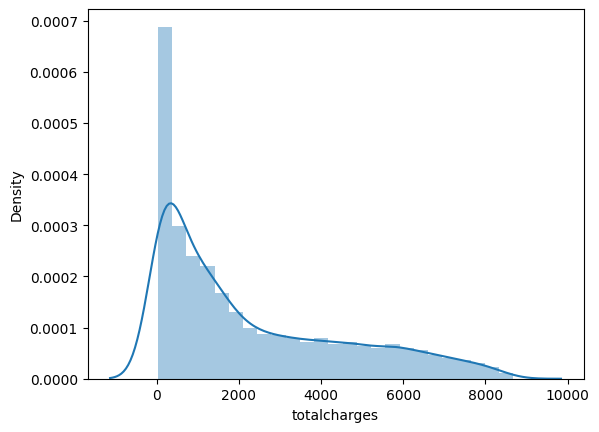

In [153]:
sns.distplot(churndata.totalcharges)

In [154]:
churndata.totalcharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

> Without getting into much detail, we will impute the missing values of totalcharges to the median since there are only 11 of them.

In [155]:
# median imputation on missing totalcharges values
churndata.totalcharges = churndata.totalcharges.fillna(churndata.totalcharges.median())

### 5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [156]:
# subset using 4 columns specified above
df = churndata[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22707/1059519840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


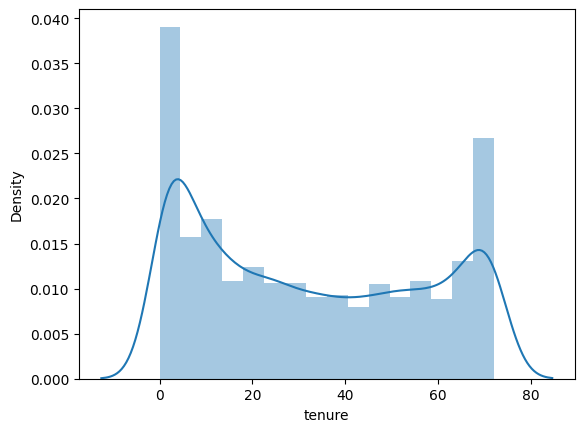

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22707/1059519840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


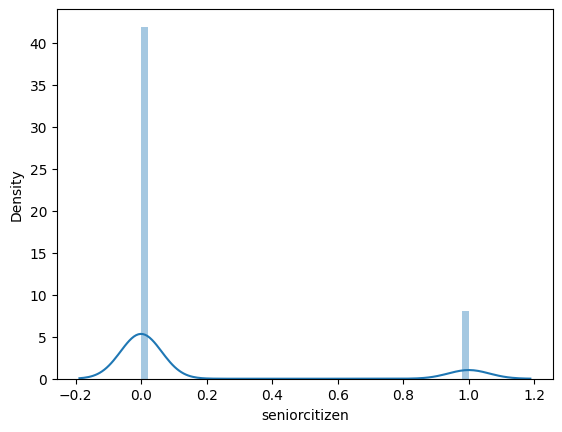

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22707/1059519840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


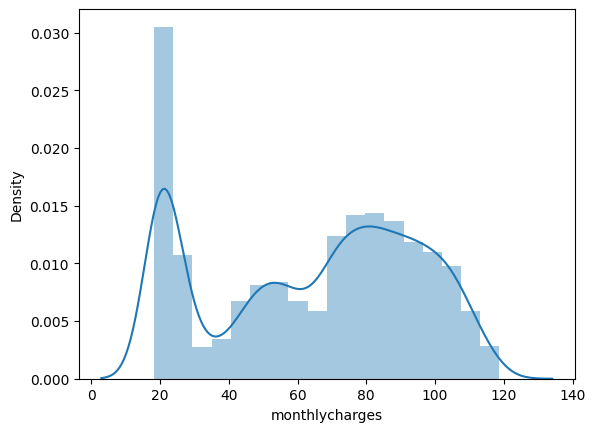

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22707/1059519840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


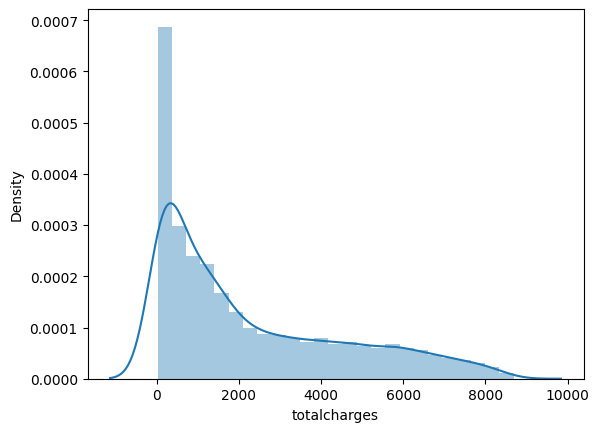

In [157]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

#### Scale the features either by using normalizer or a standard scaler.


#### Min-Max Scaler

In [158]:
normalizer = MinMaxScaler()
X_norm = normalizer.fit_transform(df)
X_norm = pd.DataFrame(X_norm, columns=df.columns)
X_norm

,tenure,seniorcitizen,monthlycharges,totalcharges
0,0.013889,0.0,0.115423,0.001275
1,0.472222,0.0,0.385075,0.215867
2,0.027778,0.0,0.354229,0.010310
3,0.625000,0.0,0.239303,0.210241
4,0.027778,0.0,0.521891,0.015330
...,...,...,...,...
7038,0.333333,0.0,0.662189,0.227521
7039,1.000000,0.0,0.845274,0.847461
7040,0.152778,0.0,0.112935,0.037809
7041,0.055556,1.0,0.558706,0.033210


#### Standard Scaler

In [159]:
standardize = StandardScaler()
X_stand = normalizer.fit_transform(df)
X_stand = pd.DataFrame(X_stand, columns=df.columns)
X_stand

,tenure,seniorcitizen,monthlycharges,totalcharges
0,0.013889,0.0,0.115423,0.001275
1,0.472222,0.0,0.385075,0.215867
2,0.027778,0.0,0.354229,0.010310
3,0.625000,0.0,0.239303,0.210241
4,0.027778,0.0,0.521891,0.015330
...,...,...,...,...
7038,0.333333,0.0,0.662189,0.227521
7039,1.000000,0.0,0.845274,0.847461
7040,0.152778,0.0,0.112935,0.037809
7041,0.055556,1.0,0.558706,0.033210


#### Split the data into a training set and a test set.

In [160]:
# transform target to dummies
y = churndata.churn.map({'No': 0, 'Yes':1})
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [161]:
# train-test split using normalized X
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=1)

In [162]:
# train-test split using standardized X
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_stand, y, random_state=1)

#### Fit a logistic regression model on the training data.

In [163]:
def rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    model = rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

In [164]:
n_predict = rf(X_norm, y)
n_predict

array([1, 0, 0, ..., 0, 1, 1])

In [165]:
s_predict = rf(X_stand, y)
s_predict

array([1, 0, 0, ..., 0, 1, 1])

#### Check the accuracy on the test data.

In [166]:
n_metrics = classification_report(y_test, n_predict)
print("Classification report for randomforest using normalized X:\n", n_metrics)

Classification report for randomforest using normalized X:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1327
           1       0.56      0.48      0.52       434

    accuracy                           0.78      1761
   macro avg       0.70      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



In [167]:
s_metrics = classification_report(y_test, s_predict)
print("Classification report for randomforest using standardized X:\n", s_metrics)

Classification report for randomforest using standardized X:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1327
           1       0.56      0.48      0.52       434

    accuracy                           0.78      1761
   macro avg       0.70      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



### Managing imbalance in the dataset

#### 1. Check for the imbalance.

In [168]:
churndata.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

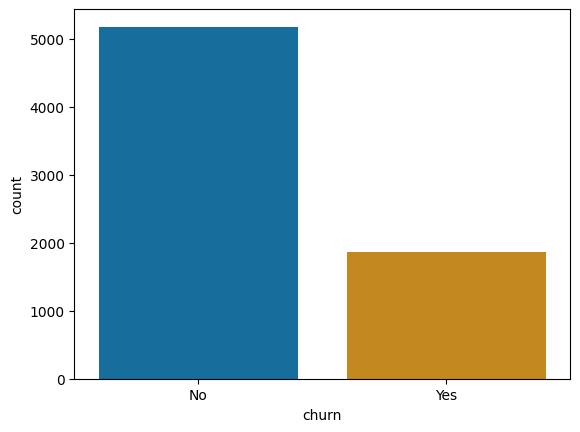

In [169]:
sns.countplot(x=churndata["churn"], palette=sns.color_palette("colorblind"))

#### 2. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.`

##### SMOTE

In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

Xn_sm, yn_sm = smote.fit_resample(X_norm, y)
Xs_sm, ys_sm = smote.fit_resample(X_stand, y)

yn_sm.value_counts(), ys_sm.value_counts()

(churn
 0    5174
 1    5174
 Name: count, dtype: int64,
 churn
 0    5174
 1    5174
 Name: count, dtype: int64)

##### TomekLinks

In [171]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

Xn_tl, yn_tl = tl.fit_resample(X_norm, y)
Xs_tl, ys_tl = tl.fit_resample(X_stand, y)

yn_tl.value_counts(normalize=True), ys_tl.value_counts(normalize=True)

(churn
 0    0.713344
 1    0.286656
 Name: proportion, dtype: float64,
 churn
 0    0.713344
 1    0.286656
 Name: proportion, dtype: float64)

#### 3. Each time fit the model and see how the accuracy of the model is.

##### SMOTE

In [172]:
# train-test split using normalized X
X_train, X_test, y_train, y_test = train_test_split(Xn_sm, yn_sm, random_state=1)

In [173]:
# train-test split using standardized X
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_sm, ys_sm, random_state=1)

In [174]:
# predictions
n_sm_predict = rf(Xn_sm, yn_sm)
s_sm_predict = rf(Xs_sm, ys_sm)

In [175]:
n_sm_metrics = classification_report(y_test, n_sm_predict)
print("Classification report for randomforest using normalized X:\n", n_sm_metrics)

Classification report for randomforest using normalized X:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1330
           1       0.78      0.81      0.80      1257

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



In [176]:
s_sm_metrics = classification_report(ys_test, s_sm_predict)
print("Classification report for randomforest using standardized X:\n", s_sm_metrics)

Classification report for randomforest using standardized X:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1330
           1       0.78      0.84      0.81      1257

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587



> **Observations:**
> - Both normalized and standardized x result in the same accuracy of 80%
> - Standadization produces higher precision for the 0s and higher recall value for the positives. If we wish to minimize false negative cases which would be helpful when determining if a client will churn or not, this standardized smote dataset would be advisable to use.`

##### TomekLinks

In [177]:
# train-test split using normalized X
X_train, X_test, y_train, y_test = train_test_split(Xn_tl, yn_tl, random_state=1)

In [178]:
# train-test split using standardized X
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_tl, ys_tl, random_state=1)

In [179]:
# predictions
n_tl_predict = rf(Xn_tl, yn_tl)
s_tl_predict = rf(Xs_tl, ys_tl)

In [180]:
n_tl_metrics = classification_report(y_test, n_tl_predict)
print("Classification report for randomforest using normalized X:\n", n_tl_metrics)

Classification report for randomforest using normalized X:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1161
           1       0.69      0.54      0.61       469

    accuracy                           0.80      1630
   macro avg       0.76      0.72      0.73      1630
weighted avg       0.79      0.80      0.79      1630



In [181]:
s_tl_metrics = classification_report(ys_test, s_tl_predict)
print("Classification report for randomforest using standardized X:\n", s_tl_metrics)

Classification report for randomforest using standardized X:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1161
           1       0.69      0.54      0.61       469

    accuracy                           0.80      1630
   macro avg       0.76      0.72      0.73      1630
weighted avg       0.79      0.80      0.79      1630



> **Observations:**
> - In the case of TomekLinks method, both normalized and standardized X aslo result in the same accuracy of 80%
> - As the imbalance remain, we can also see that the models using TomekLink datasets have lower precision and recall compared with using SMOTE.